In [1]:
1+1

2

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [15]:
three_d_array = ([[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]],
                 [[13, 14, 15, 16], [17, 18, 19, 20], [21, 22, 23, 24]]])

In [27]:
three_d_array= np.array(three_d_array)

In [30]:
len(three_d_array)

2

In [29]:
three_d_array

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]])

In [32]:
three_d_array_re=three_d_array.reshape(len(three_d_array),4*3)

In [34]:
three_d_array_re

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]])

In [23]:
len([  0,   0,   0,   0,   0,   0,  85, 252, 145,   0,   0,   0,   0,
          0,   0,   0,  48, 165, 252, 173,   0,   0,   0,   0,   0,   0,
          0,   0])

28

In [24]:
type(X_train)

numpy.ndarray

In [35]:
X_train = X_train / 255
X_test = X_test / 255

In [36]:
# RE shaping 2d array data into 1D array.
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [37]:
X_train_flattened.shape

(60000, 784)

In [38]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)



Epoch 1/5


1875/1875 [==============================] - 3s 1ms/step - loss: 0.4712 - accuracy: 0.8779
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3040 - accuracy: 0.9144
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2832 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2734 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2667 - accuracy: 0.9260


In [39]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2646 - accuracy: 0.9263


[0.26461565494537354, 0.9262999892234802]

In [40]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 950us/step


array([1.7649738e-02, 2.7843103e-07, 4.1223951e-02, 9.5263350e-01,
       2.2028668e-03, 8.4369898e-02, 2.0340101e-06, 9.9976164e-01,
       9.8307952e-02, 6.6545117e-01], dtype=float32)

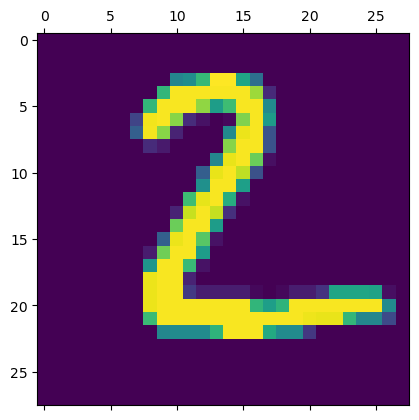

In [68]:
plt.matshow(X_test[1])

In [42]:
np.argmax(y_predicted[0])

7

In [45]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [49]:
len(y_predicted_labels)

10000

In [ ]:
y_predicted_labels

In [52]:
len(y_test)

10000

In [53]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

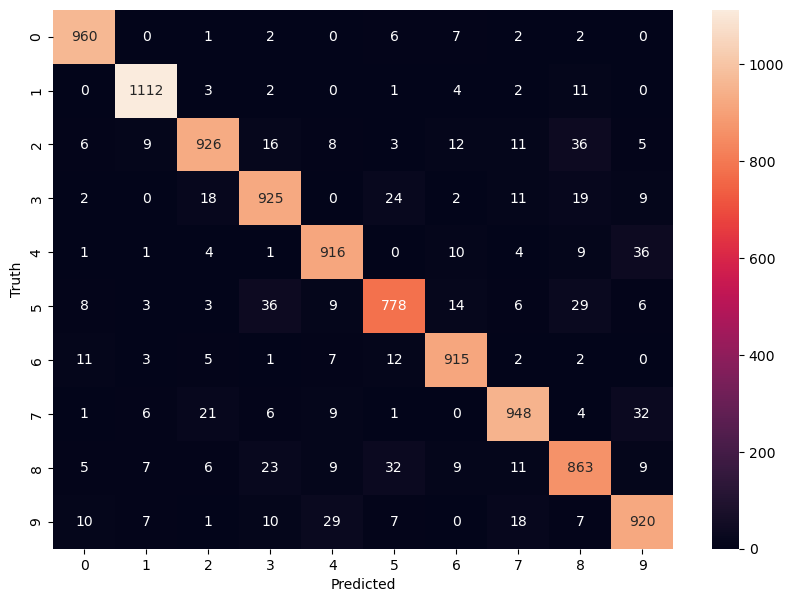

In [54]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Hidden layer



In [74]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28),name='input_layer'),
    keras.layers.Dense(300,activation='relu',name='hl1'),
     keras.layers.Dense(100,activation='softmax',name='hl2'),
     keras.layers.Dense(10,activation='sigmoid',name='Output_leayer')

])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5,batch_size=5)

Epoch 1/5
12000/12000 [==============================] - 32s 3ms/step - loss: 0.8600 - accuracy: 0.6848
Epoch 2/5
12000/12000 [==============================] - 47s 4ms/step - loss: 0.3314 - accuracy: 0.8865
Epoch 3/5
12000/12000 [==============================] - 50s 4ms/step - loss: 0.1433 - accuracy: 0.9679
Epoch 4/5
12000/12000 [==============================] - 43s 4ms/step - loss: 0.1128 - accuracy: 0.9750
Epoch 5/5
12000/12000 [==============================] - 50s 4ms/step - loss: 0.1080 - accuracy: 0.9765


In [ ]:
model.get_weights()

In [87]:
import time 
import os
def saveModel_path(model_dir="Saved models"):

    model_path=os.path.join(os.getcwd(), model_dir)
    os.makedirs(model_path, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
    model_path1 = os.path.join(model_path, fileName) 
    print(f"your model will be saved at the following location\n{model_path1}")
    return model_path1


In [89]:
model.save(saveModel_path())

your model will be saved at the following location
c:\Deep learnig Youtube\Saved models\Model_2023_12_29_12_49_38_.h5


In [91]:

def get_log_path(log_dir1="Saved models"):
    log_dir=os.path.join(os.getcwd(), log_dir1)
    fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")    
    log_path = os.path.join(log_dir, fileName)
    print(f"saving logs at:\n{log_path}")
    return log_path

log_dir = get_log_path()

saving logs at:
c:\Deep learnig Youtube\Saved models\log_2023_12_29_13_41_26


In [101]:
tensorboard_callback =tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

In [102]:
model.fit(X_train, y_train, epochs=3,batch_size=5,callbacks=[tensorboard_callback])

Epoch 1/3
12000/12000 [==============================] - 35s 3ms/step - loss: 0.0726 - accuracy: 0.9871
Epoch 2/3
12000/12000 [==============================] - 33s 3ms/step - loss: 0.0680 - accuracy: 0.9880
Epoch 3/3
12000/12000 [==============================] - 32s 3ms/step - loss: 0.0662 - accuracy: 0.9884


In [103]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [104]:
%reload_ext tensorboard

In [ ]:
C:\Deep learnig Youtube\Saved models\log_2023_12_29_13_41_26\train

In [105]:
%tensorboard --logdir Saved models/log_2023_12_29_13_41_26/train

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
2023-12-29 16:40:59.528435: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.

usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_creds_type {local,ssl,ssl_dev}]
                   [--grpc_data_provider PORT] [--purge_orphaned_data BOOL]
                   [--db URI] [--db_import] [--inspect] [--version_tb]
                   [--tag TAG] [--event_file PATH] [--path_prefix PATH]
                   [--window_title TEXT] [--max_reload_threads COUNT]
   